**Authors:** <font color=brown>Jozef Hanč & his students</font>  <br>
[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN) *P.J. Šafárik University in Košice, Slovakia* <br> 
email: [jozef.hanc@upjs.sk](mailto:jozef.hanc@upjs.sk)  
**Document:** Data analysis for AIP publishing house  
**Date**: July 2022

# Statistical analysis of AIP conference

## Parameters

In [1]:
# conference = 'ISET2018'
# pubdate = 'March 2019'
# invited = 3
# access = 'No Access'

# ds = pd.read_excel('../'+conference+'-scopus.xlsx', sheet_name='h-index', index_col=0)
# dk = pd.read_excel('../'+conference+'-scopus.xlsx', sheet_name='contributions', index_col=0)

## Analysis of topics

### numerical

In [2]:
if 'topic' in dk.columns:
    dtop = dk.groupby(['topic']).count()[['title']].rename(columns = {'title':'count'})

    print()
    md(f'**<font color=brown size=4>Numerical summary {conference} -   educational topic and science subject of contributions**')
    display(dtop.T)

**<font color=brown size=4>Numerical summary ISET2018 -   educational topic and science subject of contributions**

topic  assessment  digital technology  informal education  \
count           1                   1                   2   

topic  innovative curriculum  inquiry skills, literacy  labs, experiments  \
count                      1                         8                  3   

topic  other  problem solving  teacher's training  
count      7                3                   9

In [3]:
if 'subject' in dk.columns:
    dsub = dk.groupby(['subject']).count()[['title']].rename(columns = {'title':'count'})

    print()
    display(dsub.T)

subject  biology  biology, science  chemistry  general  physics  \
count          5                 1          3        3        5   

subject  physics, science  science  science, arts  stem  
count                   1        9              1     7

### graphical

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

**<font color=brown size=4>Graphical summary ISET2018 -  educational topic and science subject of contributions**

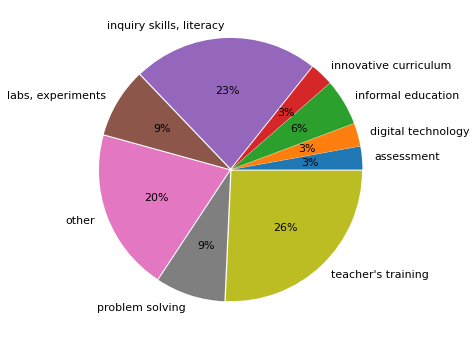

In [5]:
if 'topic' in dk.columns:
    N = dtop.shape[0]
    explode = N*[0.01]
    md(f'**<font color=brown size=4>Graphical summary {conference} -  educational topic and science subject of contributions**')
    dtop.plot(kind='pie', y = 'count', #subplots=True, 
        figsize=(16,6), legend=False, autopct='%.0f%%', textprops={'fontsize': 11}, explode=explode,ylabel='');

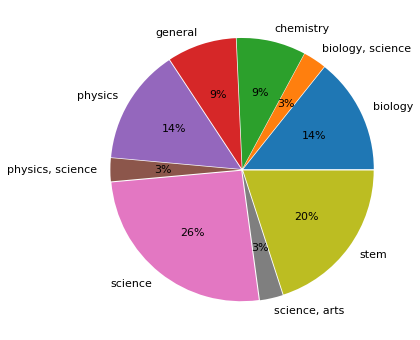

In [6]:
if 'subject' in dk.columns:
    N = dsub.shape[0]
    explode = N*[0.01]
    dsub.plot(kind='pie', y = 'count', #subplots=True, 
        figsize=(16,6), legend=False, autopct='%.0f%%', textprops={'fontsize': 11}, explode=explode,ylabel='');

## Analysis of h-index

In [7]:
ds.sort_values('h-index', ascending=False)

scopus-id first name   last name             full name  documents  \
3   57035495100     Baohui       Zhang          Baohui Zhang         32   
37  15058383900       Chat       Teeka            Chat Teeka         45   
0   56701466200    P. John    Williams      P. John Williams         42   
42  57133003100   Herawati      Susilo       Herawati Susilo         60   
1   57218701523   Chokchai    Yuenyong     Chokchai Yuenyong        129   
..          ...        ...         ...                   ...        ...   
24  57207841307  Siriwalee      Maniam      Siriwalee Maniam          1   
12  57207845579  Chatuporn  Sawatruksa  Chatuporn Sawatruksa          1   
47  57207841138  Cherdchai      Polkul      Cherdchai Polkul          1   
46  57207847238   Kantinan    Amgtesak     Kantinan Amgtesak          1   
23  57207843575   Rungtiwa   Radckakid    Rungtiwa Radckakid          1   

    citations  h-index contribution conference  
3         868       11      invited   ISET2018  
37        246       11        other   ISET2018  
0         234       10      invited   ISET2018  
42        319       10        other   ISET2018  
1         228       10      invited   ISET2018  
..        ...      ...          ...        ...  
24          0        0        other   ISET2018  
12          0        0        other   ISET2018  
47          0        0        other   ISET2018  
46          0        0        other   ISET2018  
23          0        0        other   ISET2018  

[76 rows x 9 columns]

**numerical**

In [8]:
# quartiles and IQR
q25 = lambda x: x.quantile(0.25) # lower quartile
q50 = lambda x: x.quantile(0.50) # upper quartile
q75 = lambda x: x.quantile(0.75) # upper quartile
IQR = lambda x: x.quantile(0.75)-x.quantile(0.25) # interquartile range

# counts h-index of contributions - invited vs. others
dhc = (ds.groupby(['contribution', 'h-index'])
      .agg(count = ('scopus-id','count')).rename(columns={'contribution':'participant'})).T

# h-index of contributions - invited vs. others
dhs = (ds.groupby(['contribution'])
.agg({'h-index':['mean', 'std', 'min', q25, q50, q75, 'max']})
.round(2).sort_values(by=('h-index','mean'), ascending=False).rename_axis('contribution')
)

dhall = (ds.agg({'h-index':['mean', 'std', 'min', q25, q50, q75, 'max']})
          .astype(int)
          .rename(columns={'h-index':'all'})
          .rename_axis('contribution').T)


# measures
measures = ['mean', 'std', 'minimum', '25%', '50%', '75%', 'maximum']
level = f'Conference {conference.upper()} $h$-index measures'
dhs.columns = pd.MultiIndex.from_tuples([(level, stat) for stat in measures])
dhall.columns = pd.MultiIndex.from_tuples([(level, stat) for stat in measures])

dh = pd.concat([dhs, dhall]).rename_axis('participants')
# display numerical summary
print()
display(Markdown(f'**<font color=brown size=4>Numerical summary {conference.upper()}: Scopus $h$-index of participants**'))
display(dhc)
display(dh)

**<font color=brown size=4>Numerical summary ISET2018: Scopus $h$-index of participants**

contribution invited       other                             
h-index           1  10 11    0   1   2  3  4  6  7  9  10 11
count              2  2  1    22  27  10  5  1  2  1  1  1  1

Conference ISET2018 $h$-index measures                            \
                                               mean   std minimum 25% 50% 75%   
participants                                                                    
invited                                        6.60  5.13       1   1  10  10   
other                                          1.62  2.28       0   0   1   2   
all                                            1.00  2.00       0   0   1   2   

                      
             maximum  
participants          
invited           11  
other             11  
all               11

**graphical**

In [9]:
# ymax = dh[(level,'median')].max() + 2*dh[(level,'IQ range')].max()
# ymin = dh[(level,'minimum')].min()
ymin , ymax = 0, 12

**<font color=brown size=4>Graphical summary ISET2018: Scopus $h$-index of participants**

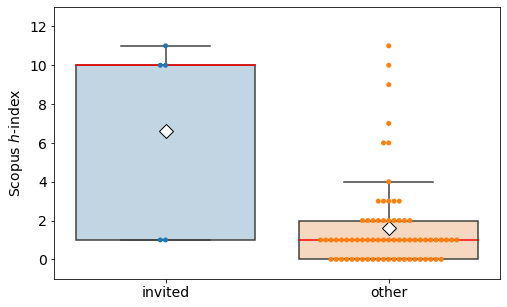

In [10]:
# visualization
print()
display(Markdown(f'**<font color=brown size=4>Graphical summary {conference.upper()}: Scopus $h$-index of participants**'))

# plots
fig, axes = plt.subplots(figsize=(8,5))
contributions = ['invited', 'other']

ax = sns.boxplot(x='contribution', y='h-index',  data = ds, ax=axes,  order = contributions, medianprops=dict(color="red", linewidth=1.5), showfliers = False, 
                showmeans=True, meanprops={"marker": "D", "markerfacecolor":"white", 
                       "markeredgecolor":"black", "markersize": "10"})    

# more transparent colors for boxplots
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

ax = sns.swarmplot(x='contribution', y='h-index', data = ds,  size = 5, alpha  = 1,  order = contributions)

# fonts and labels
plt.ylim(-1+ymin,1+ymax)
plt.xlabel(''); plt.ylabel('Scopus $h$-index', fontsize=14)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.show();

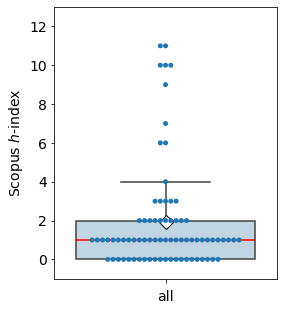

In [11]:
# visualization of all participants
fig, axes = plt.subplots(figsize=(4,5))

ax = sns.boxplot(y='h-index',data = ds, ax=axes, medianprops=dict(color="red", linewidth=1.5), showfliers = False, 
                showmeans=True, meanprops={"marker": "D", "markerfacecolor":"white", 
                       "markeredgecolor":"black", "markersize": "10"})    

# more transparent collors for boxplots
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

ax = sns.swarmplot(y='h-index', data = ds,size = 5, alpha  = 1)

# fonts and labels
plt.ylim(-1+ymin,1+ymax)
plt.xlabel('all', fontsize=14); plt.ylabel('Scopus $h$-index', fontsize=14)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.show();